In [21]:
import pandas as pd
import numpy as np
from modData import mod_data, min_max_normalize, extract_date
from stateful_model import train_stateful_model
from predict import prediction

train_param = dict(
    norm=True,
)


train = pd.read_csv("./bike-sharing-demand/train.csv")
test = pd.read_csv("./bike-sharing-demand/test.csv")

train_date = extract_date(train)
test_date = extract_date(test)

train = mod_data(train)
test = mod_data(test)

std_cols = ['temp', 'atemp', 'humidity', 'windspeed']
pred_cols = ['season', 'holiday', 'workingday', 'weather',
             'temp', 'atemp', 'humidity', 'windspeed', 'year',
             'month', 'day', 'hour']
target = ['count']

if train_param['norm']:
    train = min_max_normalize(train, std_cols, -1, 1)
    test = min_max_normalize(test, std_cols, -1, 1)

X_train = np.asarray(train[pred_cols])
y_train = np.asarray(train[target])
X_train = np.expand_dims(X_train, axis=0)
y_train = np.expand_dims(y_train, axis=0)

X_test = np.asarray(test[pred_cols])
X_test = np.expand_dims(X_test, axis = 0)

In [2]:
import matplotlib.pyplot as plt

In [48]:
X = train[pred_cols]

In [50]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4


In [56]:
for i in pred_cols:
    print(train[i].isnull().values.any())

False
False
False
False
False
False
False
False
False
False
False
False


In [30]:
from stateful_model import compile_model

In [40]:
model = compile_model(X_train)

In [45]:
model.load_weights('models/statefulGRU')

In [46]:
model.predict(X_train).reshape(X_train.shape[1])

array([  1974.2161,   5884.8677,   7061.7764, ..., -77451.13  ,
       -77431.375 , -77413.24  ], dtype=float32)

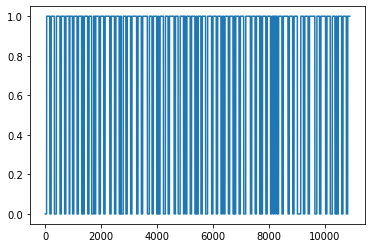

In [28]:
plt.plot(train['workingday'])

In [37]:
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64